## Быстрый градиентный метод

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import approx_fprime
from numpy.linalg import norm
#%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['figure.figsize'] = (13, 7)

In [7]:
Y0     = 0
# Alpha = 1/(2L)
#ALPHA  = 1/72
STEP   = 0.01
L = 36

In [20]:
#implementation
def FastDualAveraging(target, x0, eps, set_type = "rn", grad = approx_fprime, step = lambda k: STEP, ALPHA = lambda k: ((k+1)/(2*L))**1):
    index = 0
    y_new = Y0
                      
    grad_sum = np.zeros((len(x0),))
    zk = [x0]
    
    while True :
        index += 1
        y_old = y_new
        #x_k+1
        x_new = ALPHA(index)*y_old + (1 - ALPHA(index))*zk[index - 1]
        grad_sum += grad(x_new, target, 0.0000001)*step(index)
        #y_k+1 (шаг метода двойственных усреднений зависит от целевого множества)
        if set_type == "rn" :
            y_new = (-1/2*grad_sum)
        elif set_type == "simplex" :
            y_new = (np.exp(-(np.ones(len(x0)) + grad_sum)))
        else :
            print("you oblazhalsya! (rn and simplex are available only)")
            return zk
        #z_k+1
        zk.append(ALPHA(index)*(y_old) + (1 - ALPHA(index))*zk[index - 1])
        #exit condition
        if norm(y_new - y_old, ord = 2) < eps :
            return zk


def Gradient(target, x0, eps, set_type = "rn", grad = approx_fprime, step = lambda k: STEP, ALPHA = lambda k: ((k+1)/(2*L))**-0.5):
    xk = [x0]
    index = 0
    while True:
        index += 1
        xk.append(xk[index - 1] - 4*ALPHA(index)*grad(xk[index - 1], target, 0.0000001))
        if norm(xk[index] - xk[index - 1], ord = 2) < eps / 2 :
            return xk
        

### Исследуем метод на сходимость и характер приближения к решению
Будем рассматривать 2-мерное пространство для удобства визуализации, h пока считаем постоянным

In [21]:
A = np.array([[1, 2], [2, 3]])
b = np.array([1, 2])
x_expl = np.array([1, 0])
x0_rn = np.array([0.1, 0.2])
x0_smp = np.array([0.1, 0.2])
eps = 0.00005

# ||Ax - b||^2
def func1(x):
    return np.linalg.norm(np.dot(A, x) - b, ord = 2)**2

# ||Ax - b||
def func2(x):
    return np.linalg.norm(np.dot(A, x) - b, ord = 2)


def gradFunc1(x, func1, eps = 0) :
    return 2*A.transpose() @ (A @ x - b)

def gradFunc2(x, func2, eps = 0) :
    if np.array_equal(A @ x - b, np.zeros((len(b)))) :
        return 0
    else :
        return A.transpose() @ (A @ x - b) / norm(A @ x - b, ord = 2)

#### Построим траекторию сходимости метода для ф-ции ||Ax - b||^2 для Rn и симплекса

In [22]:
xk_rn      = FastDualAveraging(func1, x0_rn,  eps, set_type = "rn", grad = gradFunc1)
#xk_simplex = FastDualAveraging(func1, x0_smp, eps, set_type = "simplex", grad = gradFunc1)
#xk_grad    = Gradient(func1, x0_rn, eps, set_type = "rn", grad = gradFunc1, ALPHA = lambda k: 1/L)

plt.scatter([xk_rn[i][0] for i in range(0, len(xk_rn))], [xk_rn[i][1] for i in range(0, len(xk_rn))], label = "Rn", s=8)
#plt.scatter([xk_simplex[i][0] for i in range(0, len(xk_simplex))], [xk_simplex[i][1] for i in range(0, len(xk_simplex))], label = "simplex", s=8)
#plt.scatter([xk_grad[i][0] for i in range(0, len(xk_grad))], [xk_grad[i][1] for i in range(0, len(xk_grad))], label = "Rn_grad", s=8)

plt.scatter(x_expl[0], x_expl[1], label = "expl solution", s = 14)
plt.scatter(x0_rn[0], x0_rn[1], label = "start point", s = 14)

plt.xlabel("x")
plt.ylabel("y")
plt.title("||Ax - b||^2")
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in matmul
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in add
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in multiply
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply


KeyboardInterrupt: 

#### Построим график :
$$lnDiff(k) = \ln\left(\frac{f(x_k) - f(x_*)}{f(x_0) - f(x_*)}\right)$$

In [70]:
def ln_diff(x):
    return np.log((func1(x) - func1(x_expl))/(func1(x0_rn) - func1(x_expl)))

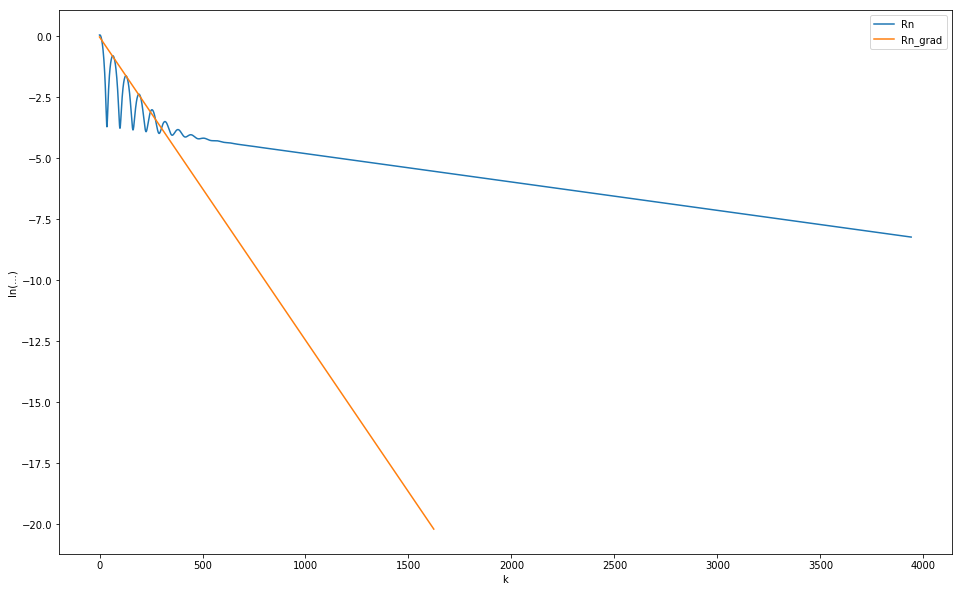

In [71]:
plt.plot([ln_diff(xk_rn[i]) for i in range(3, len(xk_rn))], label = "Rn")
plt.plot([ln_diff(xk_grad[i]) for i in range(3, len(xk_grad))], label = "Rn_grad")
plt.xlabel("k")
plt.ylabel("ln(...)")
plt.legend()

In [72]:
xk_rn[len(xk_rn) - 1]

array([0.92370464, 0.04715313])

In [73]:
xk_grad[len(xk_grad) - 1]

array([9.99963010e-01, 8.21994803e-06])